In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv("train_df.csv")
y = df.loc[:,'tourist_arrivals']
train_df = df
train_df = train_df.drop(['tourist_arrivals', 'id'],axis=1)
df.head(30)
df.isna().sum()

id                      0
date                    0
tourist_area            0
spot_facility           0
tourist_arrivals        0
area                    0
city                    0
type                    0
category                0
tourism_index        3992
info                    0
event                   0
weather_index       41040
dtype: int64

In [5]:
df.head(5)

,id,date,tourist_area,spot_facility,tourist_arrivals,area,city,type,category,tourism_index,info,event,weather_index
0,0,2018/8/1,1,A,454,A,A,A,13,1750.0,A,A,40.05
1,1,2018/8/1,1,B,823,A,A,A,13,1750.0,A,A,40.05
2,2,2018/8/1,1,C,149,A,A,A,13,1750.0,A,A,40.05
3,3,2018/8/1,1,D,157,A,A,A,13,1750.0,A,A,40.05
4,4,2018/8/1,1,E,14,A,A,A,13,1750.0,A,A,40.05


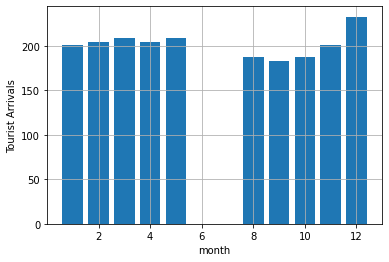

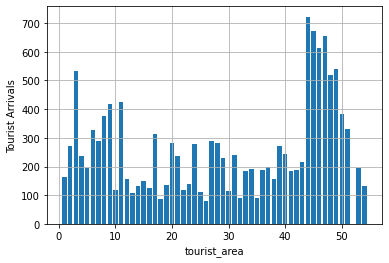

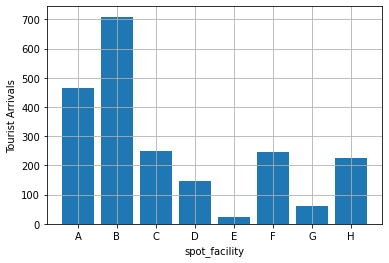

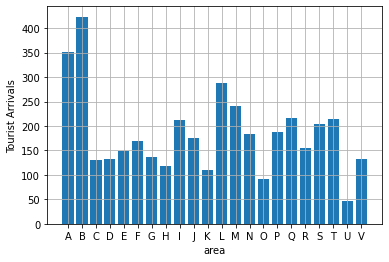

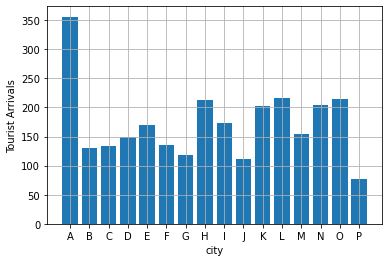

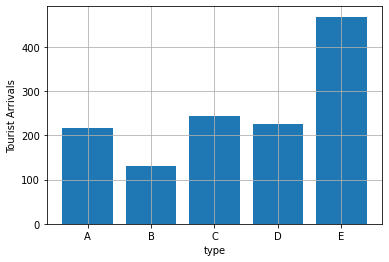

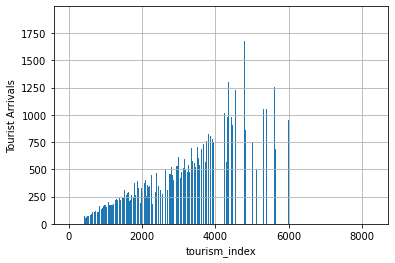

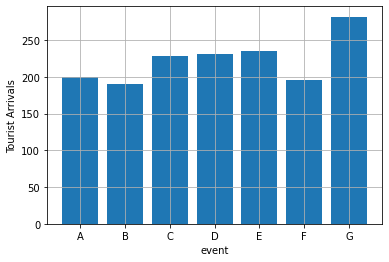

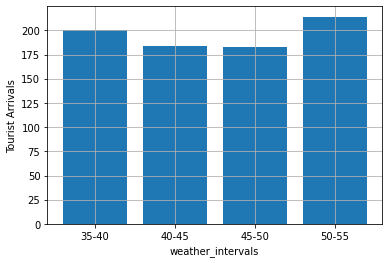

In [6]:
#print(df.area.value_counts())
def month_split(dp):
    return int(dp.split('/')[1])
def weather_split(dp):
    if dp < 40:
        a = '35-40'
    elif dp < 45:
        a = '40-45'
    elif dp < 50:
        a = '45-50'
    else:
        a = '50-55'
    return a
m = df['date'].apply(month_split)
df.loc[:,"month"] = m
w = df['weather_index'].apply(weather_split)
df.loc[:,"weather_intervals"] = w
list_ = ['month', 'tourist_area', 'spot_facility', 'area', 'city', 'type', 'tourism_index', 'event', 'weather_intervals']
df2 = df#df[df.tourist_arrivals>1000]
for dp in list_:
    b = df2.groupby(f'{dp}').median().sort_values(by = [f'{dp}'], ascending=True)
    plt.xlabel(f'{dp}')
    plt.ylabel('Tourist Arrivals')
    plt.bar(b.index, b['tourist_arrivals'])
    plt.grid(True)
    plt.show()

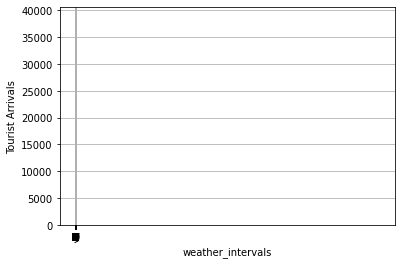

In [7]:
#print(df.area.value_counts())
def month_split(dp):
    return int(dp.split('/')[1])
def weather_split(dp):
    if dp < 40:
        a = 1#'35-40'
    elif dp < 45:
        a = 2#'40-45'
    elif dp < 50:
        a = 3#'45-50'
    elif dp <60:
        a = 4#'50-55'
    else:
        a = 2
    return a
m = df['date'].apply(month_split)
df.loc[:,"month"] = m
w = df['weather_index'].apply(weather_split)
df.loc[:,"weather_intervals"] = w
df.drop(["weather_index"], axis=1, inplace=True)
list_ = ['month', 'tourist_area', 'spot_facility', 'area', 'city', 'type', 'tourism_index', 'event', 'weather_intervals']
df2 = df#df[df.tourist_arrivals>1000]
for dp in list_:
    b = df2.groupby(f'{dp}')['tourist_arrivals'].sum().sort_values(ascending=True)
    plt.xlabel(f'{dp}')
    plt.ylabel('Tourist Arrivals')
    plt.bar(b.index, b.values/1000)
    plt.grid(True)
    #plt.show()


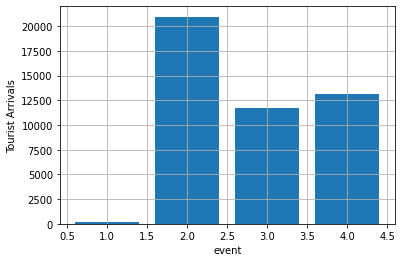

45893719

In [8]:
b = df2.groupby('weather_intervals')['tourist_arrivals'].sum().sort_values(ascending=True)
plt.xlabel('event')#
plt.ylabel('Tourist Arrivals')
plt.bar(b.index, b.values/1000)
plt.grid(True)
plt.show()
b.sum()

,id,tourist_area,tourist_arrivals,category,tourism_index,month,weather_intervals
tourist_arrivals,0.02775,0.1129,1.0,0.082123,0.519752,-0.005725,-0.069721


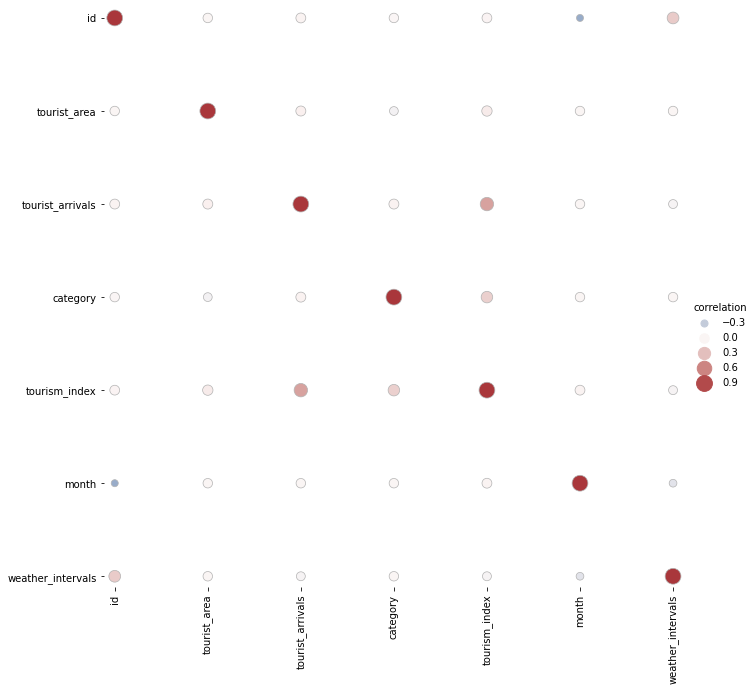

In [9]:
#display(df)
heat_array = df.corr(method='spearman').values
cols = df.corr().columns
# plt.figure(figsize=(12,8))
# plt.imshow(heat_array, cmap='coolwarm', vmin=-1, vmax = 1, aspect='auto', origin='upper')
# cbar = plt.colorbar()
# cbar.set_label('Correlation', rotation = 270)
# plt.xticks(range(len(heat_array)), labels=cols)
# plt.yticks(range(len(heat_array)), labels=cols)
# plt.show()
#sns.relplot(df)

corr = df.corr(method="spearman").stack().reset_index(name="correlation")
g = sns.relplot(corr,  x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)

df.corr()[df.corr().index=='tourist_arrivals']

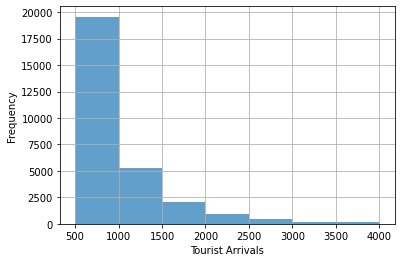

554     85
529     84
558     82
524     82
579     80
        ..
2182     1
4301     1
3736     1
3200     1
1658     1
Name: tourist_arrivals, Length: 2570, dtype: int64

In [10]:
plt.xlabel('Tourist Arrivals')
plt.ylabel('Frequency')
bin_ranges = [500,1000,1500,2000,2500,3000,3500,4000]
plt.hist(df['tourist_arrivals'], bins = bin_ranges,alpha = 0.7)
plt.grid(True)
plt.show()
display(df.tourist_arrivals[df.tourist_arrivals>500].value_counts())

In [11]:
from sklearn.preprocessing import OneHotEncoder

dummy = pd.DataFrame({"A":[1,2,3,4], "B":["Y","X","AX","BY"]})
dummy2= pd.DataFrame({"A":[1,2,1,2], "B":["X","Y", "Y","X"]})
enc = OneHotEncoder()
# Passing encoded columns
enc.fit(dummy)
enc_data = pd.DataFrame(enc.transform(dummy2).toarray(), columns = enc.get_feature_names_out()) 
enc_data

,A_1,A_2,A_3,A_4,B_AX,B_BY,B_X,B_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
#FINAL MODEL 1

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR


name_df = df2

df3 = name_df.dropna()


y = df3.loc[:,"tourist_arrivals"]

df3 = df3.drop(['id', 'date', "tourist_arrivals", "weather_intervals"], axis=1)

base_df = df3

# One hot encoding
columns_to_encode = ["spot_facility","area", "city","type", "info", "event","category", "month"]
enc = OneHotEncoder(handle_unknown="ignore",sparse=False)
enc.fit(df3.loc[:,columns_to_encode])
train_encoded = pd.DataFrame(enc.transform( 
    df3.loc[:,columns_to_encode]), columns=enc.get_feature_names_out()) 
df3 = df3.drop(columns_to_encode, axis=1)
df_concat_train = pd.concat([df3.reset_index(drop=True),train_encoded.reset_index(drop=True)], axis=1)

#Train
df_concat_train = np.array(df_concat_train)
y = np.array(y)
x_train, x_test, y_train, y_test = train_test_split(df_concat_train, y, test_size=0.25, random_state=1)


# Define the number of input features
num_features = 91

# Define the model input
inputs = keras.Input(shape=(num_features,))

# Add hidden layers with ReLU activation
x = layers.Dense(256, activation="relu")(inputs)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(32, activation="relu")(x)
# Add output layer
outputs = layers.Dense(1)(x)

# Define the model
nnt= keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
nnt.compile(loss="mse", optimizer="adam", metrics=["mae"])
nnt.fit(x_train, y_train, epochs=250)

In [52]:
from sklearn.model_selection import RandomizedSearchCV as RSCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR


name_df = df2

df3 = name_df.dropna()


y = df3.loc[:,"tourist_arrivals"]

df3 = df3.drop(['id', 'date', "tourist_arrivals", "weather_intervals"], axis=1)


#Standardization
# scaler2 = MinMaxScaler()
# d = np.reshape(np.array(df3.tourism_index),(len(df3),1))
# d = scaler2.fit_transform(d)
# df3 = df3.drop(["tourism_index"], axis=1)
# df3.loc[:,"tourim_index"] = d


base_df = df3

# One hot encoding
columns_to_encode = ["spot_facility","area", "city","type", "info", "event","category", "month"]
enc = OneHotEncoder(handle_unknown="ignore",sparse=False)
enc.fit(df3.loc[:,columns_to_encode])
train_encoded = pd.DataFrame(enc.transform( 
    df3.loc[:,columns_to_encode]), columns=enc.get_feature_names_out()) 
df3 = df3.drop(columns_to_encode, axis=1)
df_concat_train = pd.concat([df3.reset_index(drop=True),train_encoded.reset_index(drop=True)], axis=1)

#Train
df_concat_train = np.array(df_concat_train)
y = np.array(y)
x_train, x_test, y_train, y_test = train_test_split(df_concat_train, y, test_size=0.25, random_state=1)




param_grid = {
            'max_features':np.arange(0.1, 1, 0.1),
            'max_depth': [3, 5, 7, 9]
            }#'max_samples': [0.3, 0.5, 0.8]

#model = RSCV(RandomForestRegressor(n_estimators=170), param_grid, n_iter = 15, verbose=1).fit(x_train, y_train)
#model = model.best_estimator_
rf = RandomForestRegressor(n_estimators=170, max_features=0.8).fit(x_train, y_train)#,max_depth=9, max_features=0.5

y_pred = rf.predict(x_test)
#print(f"Metrics for Model {str(model).split('(')[0]}:")
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2:.2f}")

print("\n\n")

c:\Users\ansht\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Mean Squared Error: 12455.10
Mean Absolute Error: 57.85
R2 Score: 0.94





In [31]:
#FINAL MODEL 1

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR


name_df = df2

df3 = name_df.dropna()


y = df3.loc[:,"tourist_arrivals"]

df3 = df3.drop(['id', 'date', "tourist_arrivals", "weather_intervals"], axis=1)


#Standardization
# scaler2 = MinMaxScaler()
# d = np.reshape(np.array(df3.tourism_index),(len(df3),1))
# d = scaler2.fit_transform(d)
# df3 = df3.drop(["tourism_index"], axis=1)
# df3.loc[:,"tourim_index"] = d


base_df = df3

# One hot encoding
columns_to_encode = ["spot_facility","area", "city","type", "info", "event","category", "month"]
enc = OneHotEncoder(handle_unknown="ignore",sparse=False)
enc.fit(df3.loc[:,columns_to_encode])
train_encoded = pd.DataFrame(enc.transform( 
    df3.loc[:,columns_to_encode]), columns=enc.get_feature_names_out()) 
df3 = df3.drop(columns_to_encode, axis=1)
df_concat_train = pd.concat([df3.reset_index(drop=True),train_encoded.reset_index(drop=True)], axis=1)

#Train
df_concat_train = np.array(df_concat_train)
y = np.array(y)
x_train, x_test, y_train, y_test = train_test_split(df_concat_train, y, test_size=0.25, random_state=1)




models = [RandomForestRegressor(n_estimators=170), RandomForestRegressor(n_estimators=170)] #GradientBoostingRegressor(), n=170

for model in models:
    rf = model.fit(x_train, y_train)#RandomForestRegressor()
    y_pred = rf.predict(x_test)
    print(f"Metrics for Model {str(model).split('(')[0]}:")
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse:.2f}")

    mae = mean_absolute_error(y_test, y_pred)
    print(f"Mean Absolute Error: {mae:.2f}")

    r2 = r2_score(y_test, y_pred)
    print(f"R2 Score: {r2:.2f}")

    print("\n\n")


c:\Users\ansht\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Metrics for Model RandomForestRegressor:
Mean Squared Error: 12444.21
Mean Absolute Error: 57.98
R2 Score: 0.94





In [46]:
rf=model
rf
y_pred = rf.predict(x_test)
print(f"Metrics for Model {str(model).split('(')[0]}:")
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2:.2f}")

print("\n\n")

Metrics for Model RandomForestRegressor:
Mean Squared Error: 16868.92
Mean Absolute Error: 76.69
R2 Score: 0.92





In [36]:
#Test Data

df_test = pd.read_csv("test_df.csv")
a = df_test.loc[:,"date"] = pd.DatetimeIndex(df_test.loc[:,"date"]).month
df_test = df_test.drop(["id","date", "weather_index"], axis=1)
df_test.loc[:,"month"] = a
name_df = df_test

df4 = name_df
#Standardization
# scaler2 = MinMaxScaler()
# d = np.reshape(np.array(df4.tourism_index),(len(df4),1))
# d = scaler2.fit_transform(d)
# df4 = df4.drop(["tourism_index"], axis=1)
# df4.loc[:,"tourim_index"] = d


base_df = df4

# One hot encoding
columns_to_encode = ["spot_facility","area", "city","type", "info", "event","category", "month"]
test_encoded = pd.DataFrame(enc.transform( 
    df4.loc[:,columns_to_encode]), columns=enc.get_feature_names_out()) 
df4 = df4.drop(columns_to_encode, axis=1)
df_concat_test = pd.concat([df4.reset_index(drop=True),test_encoded.reset_index(drop=True)], axis=1)

#Train
df_concat_test = np.array(df_concat_test)
rf.predict(df_concat_test)
pd.DataFrame({"id" :pd.read_csv("test_df.csv")["id"].values,"tourist_arrivals":rf.predict(df_concat_test)}).to_csv("results7.csv", index=False)